In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

# 自定义的函数模块
from functions.data import prepare_dataset
from functions.model import UNet

In [2]:
# train_data, test_data = prepare_dataset("Lucchi++") # Lucchi++ /  Kasthuri++ / VNC
# # Path to the chest-ct-segmentation dataset folder
# data_dir = "dataset\Lucchi++" 
# train_images_dir = os.path.join(data_dir, "Train_In")
# train_masks_dir = os.path.join(data_dir, "Train_Out")
# test_images_dir = os.path.join(data_dir, "Test_In")
# test_masks_dir = os.path.join(data_dir, "Test_Out")


# i = 0
# # Prepare the training data, Append image and corresponding mask paths
# train_data = []
# for image_file in os.listdir(train_images_dir):
#     image_path = os.path.join(train_images_dir, image_file)
#     mask_path = os.path.join(train_masks_dir, f"{i}.png")
#     i += 1
#     train_data.append(
#     { 
#         "image" : image_path, 
#         "annotation" : mask_path
#     })

# i = 0
# # Prepare the test data, Append image and corresponding mask paths
# test_data = []
# for image_file in os.listdir(test_images_dir):
#     image_path = os.path.join(test_images_dir, image_file)
#     mask_path = os.path.join(test_masks_dir, f"{i}.png")
#     i += 1
#     test_data.append(
#     { 
#         "image" : image_path, 
#         "annotation" : mask_path
#     })
# print(train_data)



In [3]:
# from functions.data import SegmentationDataset

# # 创建数据集
# train_dataset = SegmentationDataset(
#     data_list=train_data,          # 必需：数据列表
#     patch_size=128,                # 可选：patch大小，默认128
#     stride=128,                     # 可选：滑动步长，默认64
#     transform=None,
#     # preProcessing= None# 可选：数据增强转换，默认None
# )

In [4]:
# 打印数据集基本信息
# train_dataset.print_dataset_info()

# 随机查看几张图片的patches
# train_dataset.visualize_random_images(num_images=0, patches_per_image=6)



In [5]:
# Add reconstruction function
from functions.model import reconstruct_from_patches

# Training function
from functions.model import train_model

# Inference function
from functions.model import predict


# 開始預測流程

In [ ]:
# Load the selected image and mask
# 获取预测的mask
from functions.model import segmentation_pipeline
model_path = "models/UnetTrain/overlaping_unet_segmentation_try4.13.2L_random_loss.pth"  # 模型路径

# image_path = "dataset/Lucchi++/Test_In/mask0055.png"  # 测试图片路径
# mask_path = "dataset/Lucchi++/Test_Out/55.png"  # 真实掩码路径（如果有）

image_path = "dataset/Kasthuri++/Test_In/mask1041.png"  
mask_path = "dataset/Kasthuri++/Test_Out/mask1041.png"  


# image_path = "dataset/VNC/Test_In/16.tif"  
# mask_path = "dataset/VNC/Test_Out/16.png"  

save_dir = "test/predictData"  # 结果保存目录
patch_size = 256  # patch大小
stride = 128  # 步长
predicted_mask, metrics = segmentation_pipeline(model_path, image_path, mask_path)

from functions.samPrediction import read_image

image, org_mask = read_image(image_path=image_path, mask_path=mask_path) 


=== 处理图像: mask0055 ===
设备: cuda, 模型: overlaping_unet_segmentation_try4.13k_random2_loss.pth
Patch尺寸: 256, 步长: 128
评估指标: IoU=0.3745, Dice=0.5450
二值化前的图像范围: 0-255
二值化阈值: 127
二值化后白色像素数: 20927
denoise评估结果: IoU=0.3532, Dice=0.5221


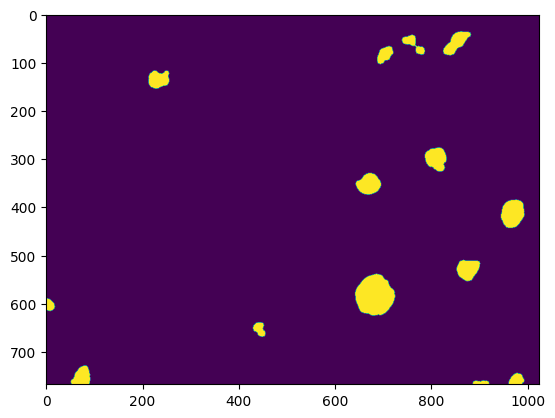

In [7]:
from functions.imagePreprocessing import ImagePreprocessor

from matplotlib import pyplot as plt

plt.imshow(predicted_mask)
# predicted_mask = ImagePreprocessor.advanced_denoise(
#     input_image=predicted_mask
# )

# plt.imshow(predicted_mask)

Creating SAM2 segmentation Model...
SAM2 segmentation Model Created!
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Original Prediction IoU: 0.3532
Generating random points for the input......


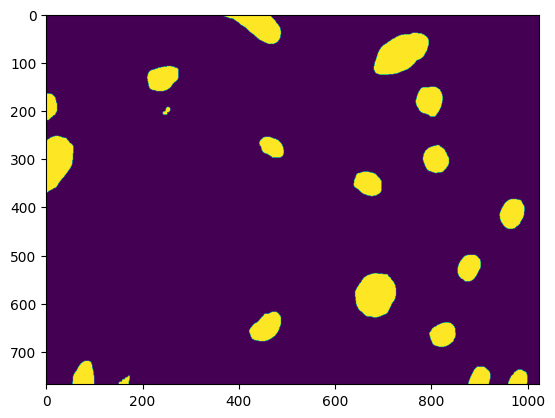

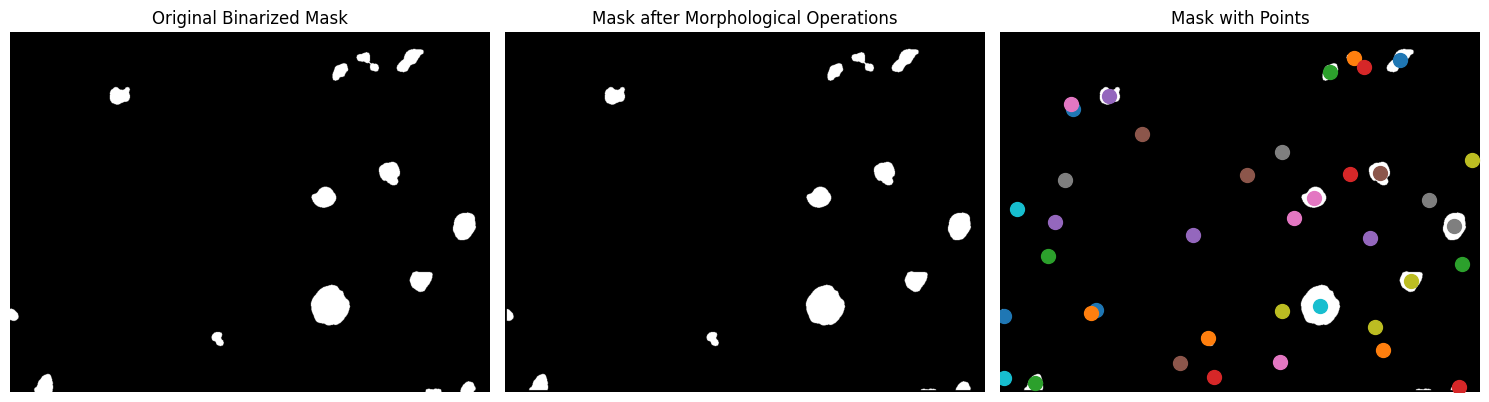

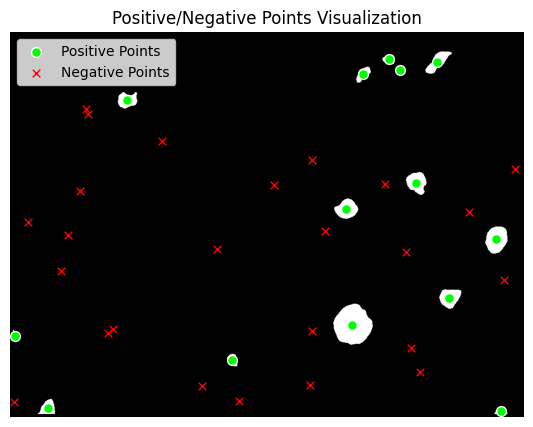

Generated 39 points for the input
输入点坐标维度: (39, 1, 2)
输入标签维度: (39, 1)
输入标签维度: (39, 1)
Sam Model predicting......
input_labels: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
input_points: [[[ 852   59]]

 [[ 755   54]]

 [[ 703   84]]

 [[ 777   75]]

 [[ 233  136]]

 [[ 810  300]]

 [[ 670  353]]

 [[ 969  413]]

 [[ 876  530]]

 [[ 682  584]]

 [[   9  605]]

 [[ 443  653]]

 [[  75  749]]

 [[ 978  756]]

 [[ 412  433]]

 [[ 383  705]]

 [[ 627  397]]

 [[ 139  316]]

 [[ 602  595]]

 [[  36  378]]

 [[ 205  592]]

 [[ 194  600]]

 [[ 985  494]]

 [[ 456  735]]

 [[ 116  404]]

 [[ 303  217]]

 [[ 597  704]]

 [[ 915  358]]

 [[ 799  629]]

 [[   7  737]]

 [[ 155  163]]

 [[ 817  678]]

 [[ 101  477]]

 [[ 747  302]]

 [[ 789  438]]

 [[ 527  305]]

 [[ 151  154]]

 [[ 601  255]]

 [[1007  272]]]


f:\github\segment-anything-2\sam2\modeling\backbones\hieradet.py:70: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  x = F.scaled_dot_product_attention(
f:\github\segment-anything-2\sam2\modeling\sam\transformer.py:270: UserWarning: Memory efficient kernel not used because: (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:723.)
  out = F.scaled_dot_product_attention(q, k, v, dropout_p=dropout_p)
f:\github\segment-anything-2\sam2\modeling\sam\transformer.py:270: UserWarning: Memory Efficient attention has been runtime disabled. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/transformers/sdp_utils_cpp.h:495.)
  out = F.scaled_dot_product_attention(q, k, v, dropout_p=dropout_p)

Sam Model predict done!
[0.968269   0.9724878  0.97492355 0.9745155  0.93946344 0.96760756
 0.95319664 0.6482411  0.8936568  0.975137   0.04876097 0.94175243
 0.95098704 0.9652079  0.06800028 0.03466891 0.00743539 0.04478566
 0.37390167 0.17184146 0.2535786  0.22890109 0.29894158 0.70603347
 0.0352543  0.00288935 0.06949631 0.02144894 0.06326929 0.02684449
 0.59507835 0.13940893 0.01816058 0.05145634 0.07201314 0.14806733
 0.56755805 0.03634237 0.01949529]

Performance Metrics:
Original IoU: 0.3532
Enhanced IoU: 0.4083
IoU Improvement: 15.57%
Processing Time: 2.21 seconds


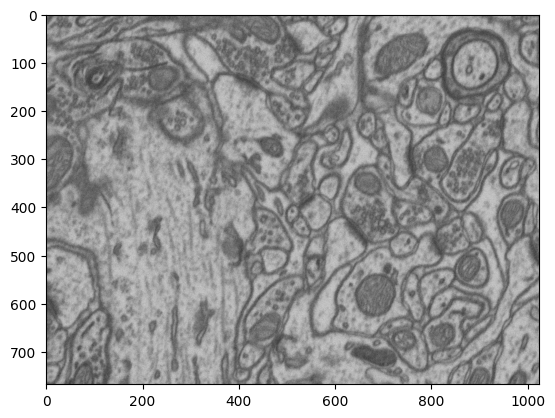

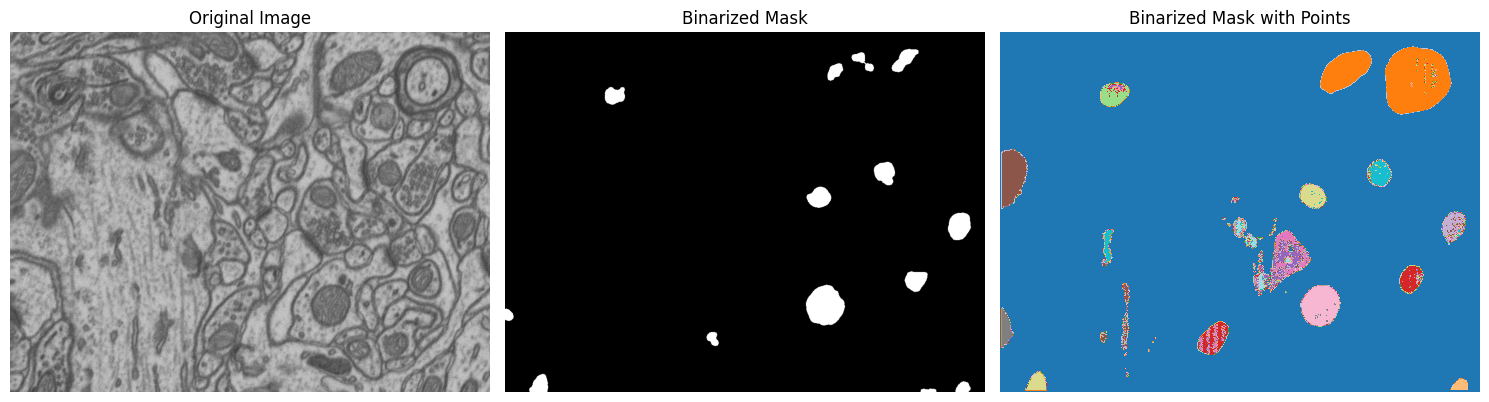

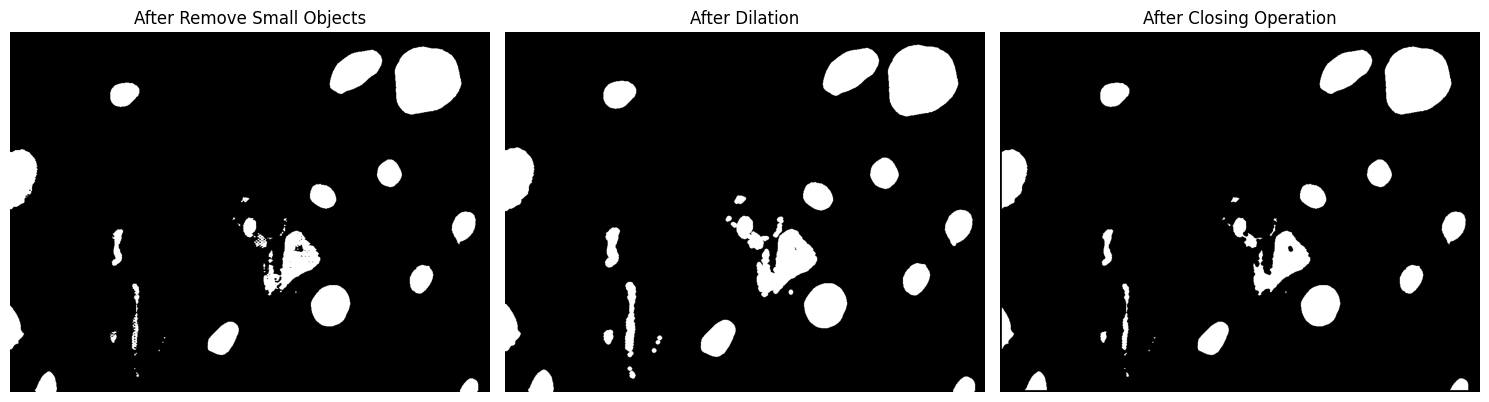

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 0.35324855950725215,
 0.40826605344064787,
 2.2068588733673096)

In [8]:
from functions.samPrediction import main_prediction_process
from functions.samPrediction import build_sam2_model

sam2_model = build_sam2_model(
        sam2_checkpoint = "./checkpoints/sam2.1_hiera_large.pt", 
        model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml",
)
print(org_mask)
print(predicted_mask)

plt.imshow(org_mask)

main_prediction_process(
    sam2_model=sam2_model,
    image=image,
    predicted_mask=predicted_mask,
    ground_truth_mask=org_mask
)